In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

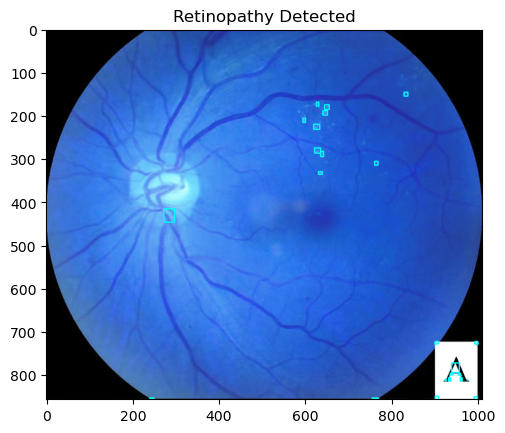

True

In [10]:
image = cv.imread('photos/Medical Images/med image 48.png')
blurred = cv.GaussianBlur(image, (1, 1), 0)
background = cv.morphologyEx(blurred, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15)))
subtracted = cv.subtract(blurred, background)
gray = cv.cvtColor(subtracted, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 130)
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
#contour_img = np.zeros_like(subtracted)
#new_img = cv.drawContours(image, contours, -1, (0, 255, 255), 2)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)


plt.imshow(image)
plt.title('Retinopathy Detected')
plt.show()

cv.imshow('Fundo', image)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite('photos/Medical Images/Ret detected.jpg', image)